In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [43]:
train.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
2,8492423,21,weekly,0,2303,0,5,8,2,7,...,600,74850,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1
3,7948313,26,bi-weekly,0,2795,0,4,4,1,6,...,800,50800,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1
4,4297036,43,bi-weekly,0,5000,0,2,1,1,2,...,1100,69100,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1


# Exploratory Data Analysis (EDA)

First, get a quick statistical summary of the features in our dataset, their datatypes and whether or not null values are contained in this dataset

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entry_id              12516 non-null  int64  
 1   age                   12516 non-null  int64  
 2   pay_schedule          12516 non-null  object 
 3   home_owner            12516 non-null  int64  
 4   income                12516 non-null  int64  
 5   months_employed       12516 non-null  int64  
 6   years_employed        12516 non-null  int64  
 7   current_address_year  12516 non-null  int64  
 8   personal_account_m    12516 non-null  int64  
 9   personal_account_y    12516 non-null  int64  
 10  has_debt              12516 non-null  int64  
 11  amount_requested      12516 non-null  int64  
 12  risk_score            12516 non-null  int64  
 13  risk_score_2          12516 non-null  float64
 14  risk_score_3          12516 non-null  float64
 15  risk_score_4       

In [45]:
train.describe().drop(['Entry_id','home_owner','e_signed','has_debt',
                       'months_employed','years_employed',
                       'current_address_year','personal_account_m','personal_account_y'], axis = 1).transpose()

,count,mean,std,min,25%,50%,75%,max
age,12516.0,43.026766,11.865891,18.000000,34.000000,42.000000,51.000000,96.000000
income,12516.0,3654.110658,1508.072163,905.000000,2575.000000,3255.000000,4661.250000,9985.000000
amount_requested,12516.0,950.251518,706.915146,350.000000,600.000000,700.000000,1100.000000,10200.000000
risk_score,12516.0,61133.401246,15396.809340,2100.000000,49450.000000,61200.000000,72750.000000,99750.000000
risk_score_2,12516.0,0.690665,0.090294,0.023258,0.641221,0.699621,0.752053,0.999997
risk_score_3,12516.0,0.877954,0.054197,0.451371,0.850893,0.880993,0.911485,0.999012
risk_score_4,12516.0,0.582848,0.125260,0.016724,0.499887,0.588202,0.672431,0.978932
risk_score_5,12516.0,0.718456,0.121103,0.153367,0.635005,0.725717,0.806576,0.993363
ext_quality_score,12516.0,0.621944,0.139876,0.010184,0.519794,0.624081,0.729609,0.970249
ext_quality_score_2,12516.0,0.621912,0.139623,0.006622,0.519662,0.623781,0.728389,0.966953


In [46]:
train.isnull().sum()

Entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

Next, display the balance of the class label (e_signed) with a Count Plot

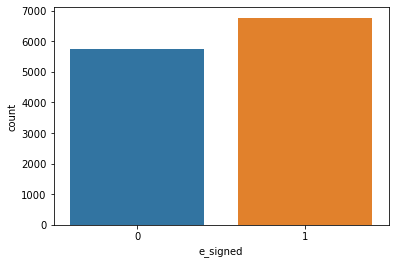

In [47]:
sns.countplot(data = train, x = 'e_signed');

Then, explore the distribution of the income depending on whether the customer has an existing debt or not based on the label class

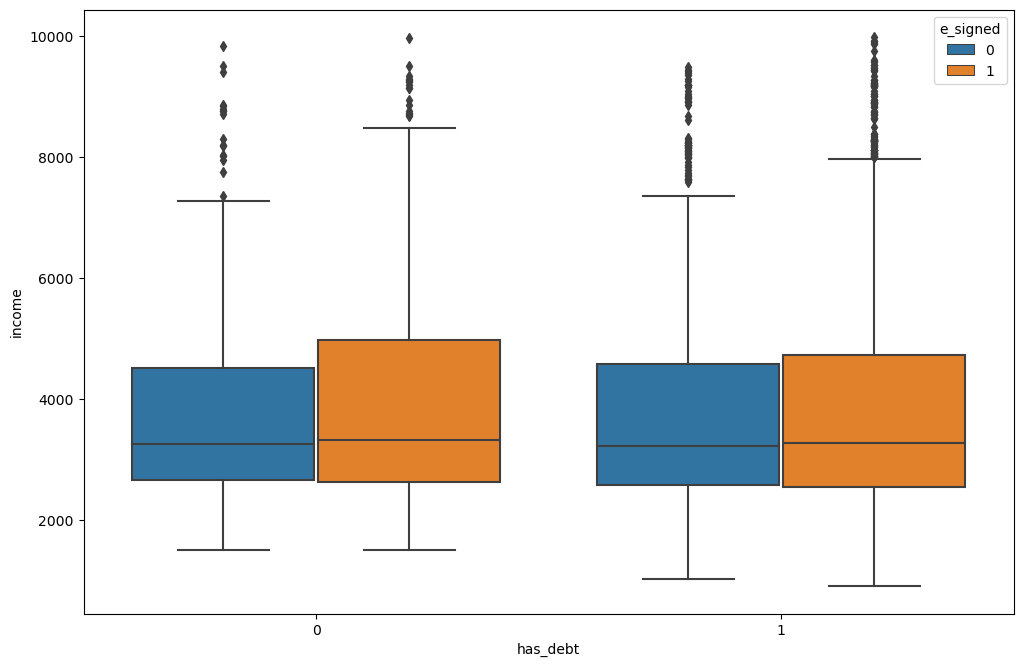

In [48]:
plt.figure(figsize = (12,8), dpi = 100)

sns.boxplot(data = train, x = 'has_debt', y = 'income', hue = 'e_signed');

Explore the relation between the income of a customer and the amount of loan they requested based on the label class

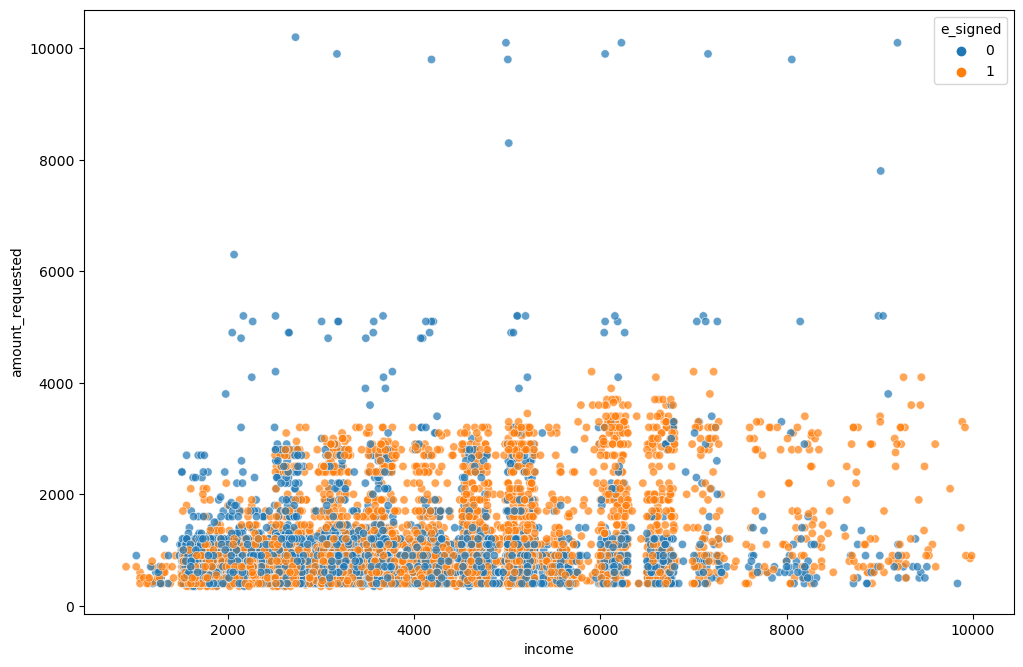

In [49]:
plt.figure(figsize = (12,8), dpi = 100)

sns.scatterplot(data = train, x = 'income', y = 'amount_requested', hue = 'e_signed', alpha = 0.7);

An important feature in this dataset is the pay_schedule column and since it is an object type feature, we will need to first convert it to dummy variables to determine its correlation with the target (e_signed)

In [50]:
train_with_dummies = pd.get_dummies(train)

Now that the pay_schedule feature has been converted to dummy variables based on the distinct string values found in the column, the correlation between each feature and the label can now be calculated

In [51]:
train_with_dummies.corr()['e_signed'].sort_values()

personal_account_m          -0.088811
age                         -0.084775
home_owner                  -0.054786
inquiries_last_month        -0.031749
ext_quality_score           -0.029381
risk_score_3                -0.028525
personal_account_y          -0.025547
ext_quality_score_2         -0.021148
pay_schedule_bi-weekly      -0.017884
current_address_year        -0.016873
risk_score_5                -0.005864
Entry_id                    -0.004522
pay_schedule_monthly        -0.004491
months_employed             -0.000714
pay_schedule_weekly          0.005856
risk_score_4                 0.007270
years_employed               0.009607
risk_score_2                 0.010032
pay_schedule_semi-monthly    0.024336
has_debt                     0.032952
income                       0.039160
amount_requested             0.064944
risk_score                   0.082468
e_signed                     1.000000
Name: e_signed, dtype: float64

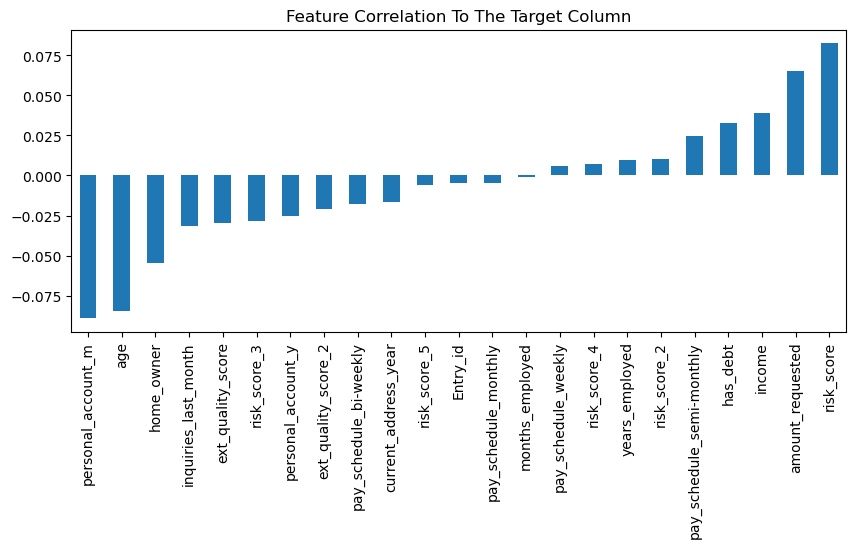

In [53]:
plt.figure(figsize = (10,4), dpi = 100)

train_with_dummies.corr()['e_signed'].sort_values().drop('e_signed', axis = 0).plot(kind = 'bar')

plt.title('Feature Correlation To The Target Column');

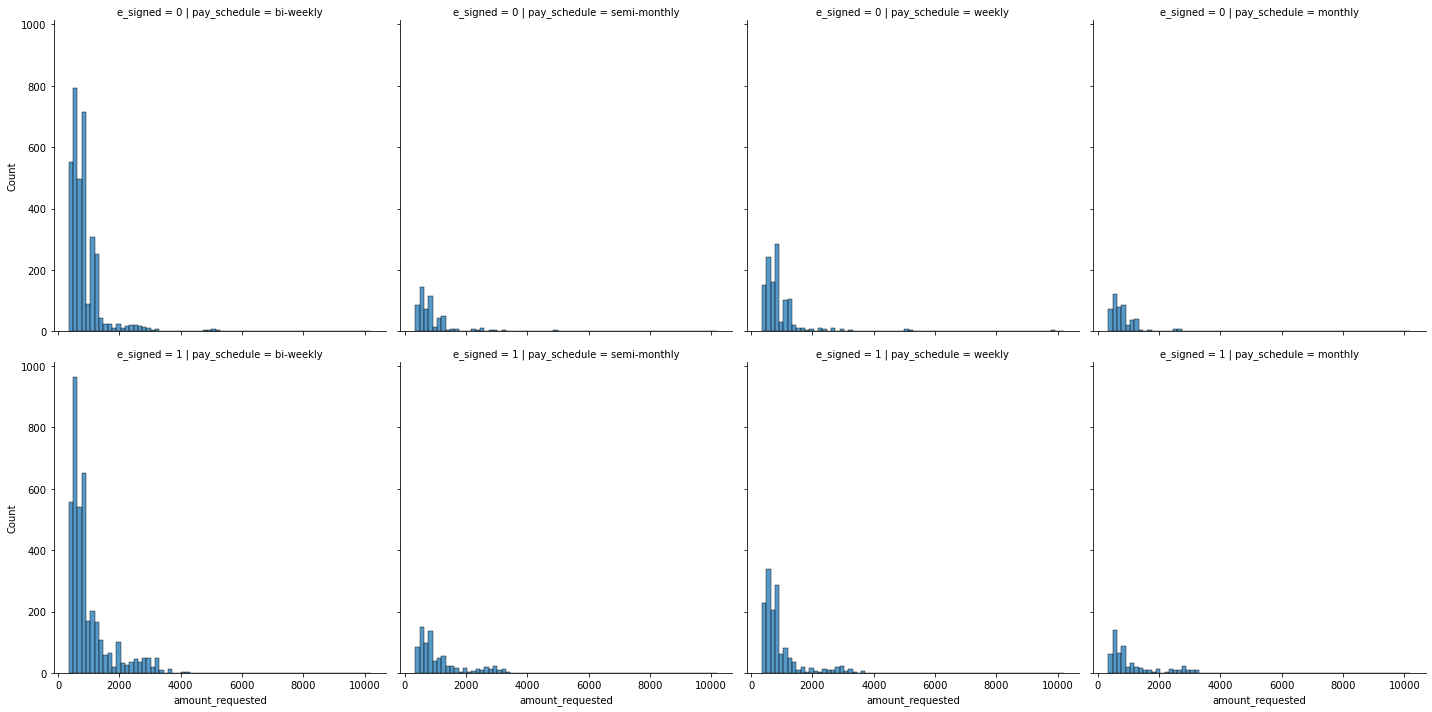

In [54]:
sns.displot(data = train, x = 'amount_requested', kind = 'hist', bins = 70, col = 'pay_schedule', row = 'e_signed');

The figure above shows the distribution of the amount of loan requested by customers separated into rows of their e-signing status and columns of their pay schedules

# Creating the machine learning model

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [125]:
train = pd.read_csv('train.csv')
X = pd.get_dummies(train.drop('e_signed', axis = 1),drop_first = True)
y = train['e_signed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

1. Random Forest Classifier

In [198]:
rfc = RandomForestClassifier(bootstrap = False,max_features = 5,criterion = 'entropy', n_estimators = 200, random_state = 55)

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=5,
                       n_estimators=200, random_state=55)

In [199]:
rfc_preds = rfc.predict(X_test)

              precision    recall  f1-score   support

           0       0.62      0.59      0.60       854
           1       0.67      0.70      0.68      1024

    accuracy                           0.65      1878
   macro avg       0.65      0.64      0.64      1878
weighted avg       0.65      0.65      0.65      1878



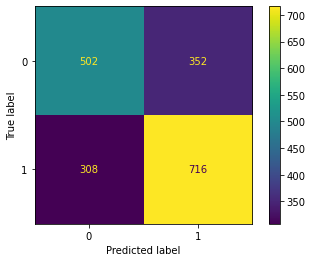

In [200]:
plot_confusion_matrix(rfc, X_test, y_test)

print(classification_report(y_test, rfc_preds))

2. Gradient Boosting Classifier

In [213]:
gb = GradientBoostingClassifier(learning_rate = 0.05, n_estimators = 200, max_depth = 5, max_features = 6)

gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=5, max_features=6,
                           n_estimators=200)

In [214]:
gb_preds = gb.predict(X_test)

              precision    recall  f1-score   support

           0       0.62      0.56      0.59       854
           1       0.66      0.72      0.69      1024

    accuracy                           0.65      1878
   macro avg       0.64      0.64      0.64      1878
weighted avg       0.64      0.65      0.64      1878



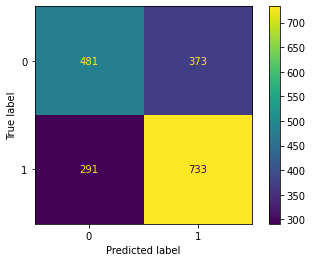

In [215]:
plot_confusion_matrix(gb, X_test, y_test)

print(classification_report(y_test, gb_preds))

3. Adaptive Boosting Classifier

In [241]:
adb = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2,), n_estimators = 50,random_state = 101)

adb.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   random_state=101)

In [242]:
adb_preds = adb.predict(X_test)

              precision    recall  f1-score   support

           0       0.60      0.55      0.57       854
           1       0.65      0.69      0.67      1024

    accuracy                           0.63      1878
   macro avg       0.62      0.62      0.62      1878
weighted avg       0.63      0.63      0.63      1878



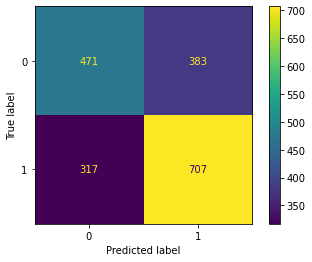

In [243]:
plot_confusion_matrix(adb, X_test, y_test)

print(classification_report(y_test, adb_preds))

4. Voting Classifier

In [244]:
evc = VotingClassifier(estimators = [('rfc', rfc),('gb', gb), ('adb', adb)], voting = 'hard')

evc.fit(X,y)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(bootstrap=False,
                                                     criterion='entropy',
                                                     max_features=5,
                                                     n_estimators=200,
                                                     random_state=55)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.05,
                                                         max_depth=5,
                                                         max_features=6,
                                                         n_estimators=200)),
                             ('adb',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                                                 random_state=101))])

In [246]:
test = pd.get_dummies(test, drop_first = True)

In [247]:
test['e_signed'] = evc.predict(test)

In [248]:
submission6 = test[['Entry_id', 'e_signed']]

In [249]:
submission6.to_csv('submission6.csv', index = False)